In [99]:
#import packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm 
import scipy.stats as stats
from stargazer.stargazer import Stargazer, LineLocation
import nltk
from nltk.corpus import stopwords
import lemmy

In [100]:
dataset = pd.read_csv("cleandata.csv",index_col="Unnamed: 0")


In [101]:
dateend = datetime(2021,2,4)
dstart = datetime(2020,2,26)
linde_date = datetime.strptime("2020-08-28", "%Y-%m-%d")

In [102]:
dataset['datetime'] = [datetime.strptime(d, "%Y-%m-%d") for d in dataset['datetime']]
dataset['date_clean'] = [datetime.strptime(str(d), "%Y-%m-%d") for d in dataset['date_clean']]
dataset = dataset[dataset['datetime'] > dstart]

In [103]:
dataset = dataset.reset_index(drop = True)

In [104]:
plt.rcParams.update({'font.size': 22})

Laver et plot til opgaven 

In [105]:
n_women_set = dataset.groupby('date_clean').agg({'women_binary': ['mean','sum']})
n_women_set = n_women_set['women_binary'] 

In [106]:
dates = n_women_set.index
#dates = [datetime.strptime(d, "%Y-%m-%d") for d in list(dates)]
n_women_set['dates'] = dates
n_women_set = n_women_set.reset_index(drop = True)
dateend = datetime(2020,9,1)
dstart = datetime(2020,8,20)

In [107]:
fourteen_days = dataset[abs(dataset['days_till_linde_28']) <=14]
before = fourteen_days.loc[fourteen_days['treatment'] == 0,'women_binary'].mean()
after = fourteen_days.loc[fourteen_days['treatment'] == 1,'women_binary'].mean()
#mean_30_b = before.loc[before['date_clean']  > linde_date - timedelta(30),'n_women'].mean()
#mean_30_a = after.loc[after['date_clean']  <= linde_date + timedelta(30),'n_women'].mean()


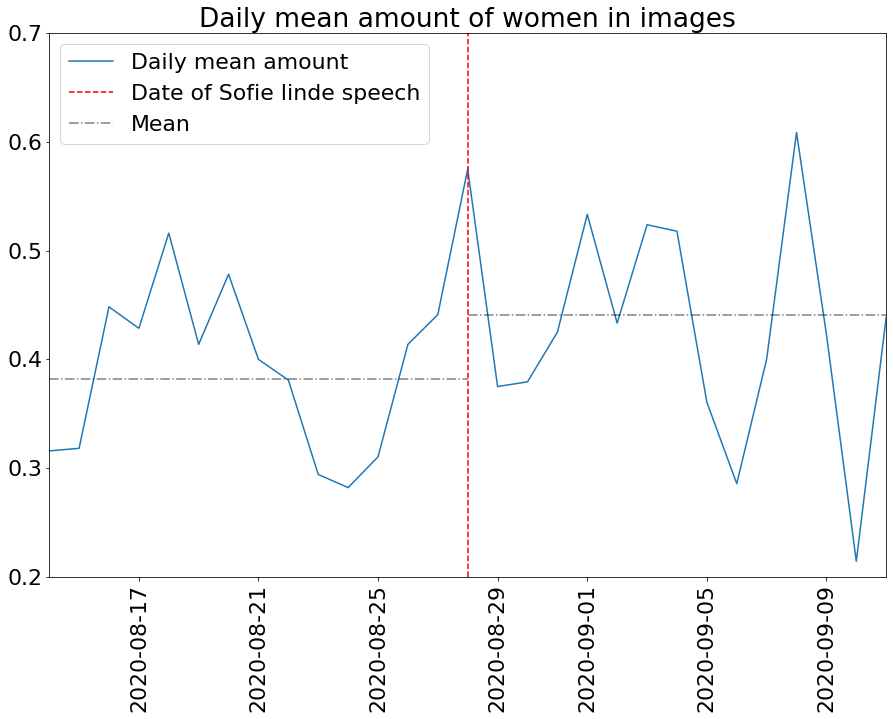

In [108]:
 
#n_women_set.plot(y = "mean",x = "dates", label = "Daily mean amount")
plt.figure(figsize=(15,10))
plt.plot(n_women_set['dates'],n_women_set['mean'], label = "Daily mean amount")
#plt.plot()
plt.xlim(dstart,dateend)
plt.ylim(0,1.5)
plt.xticks(rotation = 90)
plt.title("Daily mean amount of women in images")
plt.axvline(x = linde_date, color = 'r', label = 'Date of Sofie linde speech', linestyle = "--") 

plt.axhline(before, xmax = 0.5, color = 'black', label = 'Mean', linestyle = "-.", alpha = 0.5) 
plt.axhline(after, xmin = 0.5, color = 'black',  linestyle = "-.", alpha = 0.5) 

plt.xlim(linde_date - timedelta(14),linde_date + timedelta(14))
plt.ylim(0.2,0.7)
plt.legend()

plt.savefig("plots\\daily_28_binary_14_withmean.png")

plt.show()

### No controlls all periods

In [109]:
y = "women_binary"

In [110]:
model1 = sm.logit(formula= y + " ~ treatment_28" , data = dataset).fit() 
model2 = sm.logit(formula= y + " ~ treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=30]).fit() 
model3 = sm.logit(formula= y + " ~ treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=14]).fit() 
model4 = sm.logit(formula= y + " ~ treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=7]).fit() 
model5 = sm.logit(formula= y + " ~ treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=3]).fit() 


stargazer = Stargazer([model1,model2,model3,model4,model5])
stargazer.title('Baseline models')
stargazer

Optimization terminated successfully.
         Current function value: 0.657443
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675522
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678181
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677057
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680580
         Iterations 4


In [111]:
AVE = model1.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model2.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model3.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model4.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model5.get_margeff('overall', dummy = True)
print(AVE.summary())

        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
treatment_28     0.0615      0.009      6.509      0.000       0.043       0.080
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
treatment_28     0.0280      0.023      1.219      0.223      -0.017       0.073
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|  

### Controlls in all periods

## 14 days

In [112]:
day = 14

In [113]:
model1 = sm.logit(formula= y + " ~ treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model2 = sm.logit(formula= y + " ~ sex +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model3 = sm.logit(formula= y + " ~ bloc +  treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model4 = sm.logit(formula= y + " ~ sex + bloc +  treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model5 = sm.logit(formula= y + " ~ sex *treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model6 = sm.logit(formula= y + " ~ bloc * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 

#superusers and tenpersent
model7 = sm.logit(formula= y + " ~ superuser +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model8 = sm.logit(formula= y + " ~ superuser * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model9 = sm.logit(formula= y + " ~ tenpercent +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model10 = sm.logit(formula= y + " ~ tenpercent * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
#model6 = sm.logit(formula= y + " ~ percentile + treatment" , data = dataset[abs(dataset['days_till_linde']) <=day]).fit() 
#model7 = sm.logit(formula= y + " ~ percentile * treatment" , data = dataset[abs(dataset['days_till_linde']) <=day]).fit() 



stargazer = Stargazer([model1,model2,model3,model4,model5,model6, model7,model8,model9,model10])
stargazer.title('Heterogenous effectss')
stargazer

Optimization terminated successfully.
         Current function value: 0.678181
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.645938
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678177
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.645804
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.645938
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678164
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678009
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677942
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677610
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677594
  

In [114]:
AVE = model1.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model2.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model3.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model4.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model5.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model6.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model7.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model8.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model9.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model10.get_margeff('overall', dummy = True)
print(AVE.summary())

        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
treatment_28     0.0531      0.032      1.684      0.092      -0.009       0.115
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sex[T.m]        -0.2500      0.030     -8.247      0.000      -0.309      -0.191
treatment_28     0.0435      0.031      1.421      0.155      -0.017       0.104
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:            

## 3 days

In [115]:
day = 3

In [116]:
model1 = sm.logit(formula= y + " ~ treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model2 = sm.logit(formula= y + " ~ sex +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model3 = sm.logit(formula= y + " ~ bloc +  treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model4 = sm.logit(formula= y + " ~ sex + bloc +  treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model5 = sm.logit(formula= y + " ~ sex *treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model6 = sm.logit(formula= y + " ~ bloc * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 

#superusers and tenpersent
model7 = sm.logit(formula= y + " ~ superuser +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model8 = sm.logit(formula= y + " ~ superuser * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model9 = sm.logit(formula= y + " ~ tenpercent +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model10 = sm.logit(formula= y + " ~ tenpercent * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
#model6 = sm.logit(formula= y + " ~ percentile + treatment" , data = dataset[abs(dataset['days_till_linde']) <=day]).fit() 
#model7 = sm.logit(formula= y + " ~ percentile * treatment" , data = dataset[abs(dataset['days_till_linde']) <=day]).fit() 



stargazer = Stargazer([model1,model2,model3,model4,model5,model6, model7,model8,model9,model10])
stargazer.title('Heterogenous effectss')
stargazer

Optimization terminated successfully.
         Current function value: 0.680580
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.634270
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680579
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.634267
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630939
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.671846
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675822
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679540
  

In [117]:
AVE = model1.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model2.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model3.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model4.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model5.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model6.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model7.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model8.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model9.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model10.get_margeff('overall', dummy = True)
print(AVE.summary())

        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
treatment_28     0.0598      0.067      0.897      0.370      -0.071       0.191
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sex[T.m]        -0.2982      0.063     -4.767      0.000      -0.421      -0.176
treatment_28     0.0486      0.064      0.761      0.447      -0.077       0.174
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:            

## 7 days

In [119]:
dataset['days_till_linde_28_norm'] = [dataset['days_till_linde_28'] + abs(dataset['days_till_linde_28'].min())][0]

In [139]:
day = 7

In [140]:
model1 = sm.logit(formula= y + " ~ treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model2 = sm.logit(formula= y + " ~ sex +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model3 = sm.logit(formula= y + " ~ bloc +  treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model4 = sm.logit(formula= y + " ~ sex + bloc +  treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model5 = sm.logit(formula= y + " ~ sex *treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model6 = sm.logit(formula= y + " ~ bloc * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 

#superusers and tenpersent
model7 = sm.logit(formula= y + " ~ superuser +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model8 = sm.logit(formula= y + " ~ superuser * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model9 = sm.logit(formula= y + " ~ tenpercent +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model10 = sm.logit(formula= y + " ~ tenpercent * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
#model6 = sm.logit(formula= y + " ~ percentile + treatment" , data = dataset[abs(dataset['days_till_linde']) <=day]).fit() 
#model7 = sm.logit(formula= y + " ~ percentile * treatment" , data = dataset[abs(dataset['days_till_linde']) <=day]).fit() 


stargazer = Stargazer([model1,model2,model3,model4,model5,model6, model7,model8,model9,model10])
stargazer.title('Heterogenous effectss')
stargazer

Optimization terminated successfully.
         Current function value: 0.677057
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.646244
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.676951
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.645285
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643468
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.676591
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677018
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671813
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.676485
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675372
  

In [141]:
model11 = sm.logit(formula= y + " ~ treatment_28 + days_till_linde_28_norm" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model12 = sm.logit(formula= y + " ~ treatment_28 * days_till_linde_28_norm" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 



Optimization terminated successfully.
         Current function value: 0.676782
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676782
         Iterations 5


In [142]:
stargazer = Stargazer([model11,model12])
stargazer.title('Heterogenous effectss')
stargazer

In [138]:
AVE = model1.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model2.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model3.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model4.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model5.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model6.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model7.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model8.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model9.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model10.get_margeff('overall', dummy = True)
print(AVE.summary())

        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
treatment_28     0.0280      0.023      1.219      0.223      -0.017       0.073
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sex[T.m]        -0.2738      0.022    -12.575      0.000      -0.317      -0.231
treatment_28     0.0176      0.022      0.794      0.427      -0.026       0.061
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:            

## 30 days

In [86]:
day = 30

In [87]:
model1 = sm.logit(formula= y + " ~ treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model2 = sm.logit(formula= y + " ~ sex +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model3 = sm.logit(formula= y + " ~ bloc +  treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model4 = sm.logit(formula= y + " ~ sex + bloc +  treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model5 = sm.logit(formula= y + " ~ sex *treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model6 = sm.logit(formula= y + " ~ bloc * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 

#superusers and tenpersent
model7 = sm.logit(formula= y + " ~ superuser +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model8 = sm.logit(formula= y + " ~ superuser * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model9 = sm.logit(formula= y + " ~ tenpercent +treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
model10 = sm.logit(formula= y + " ~ tenpercent * treatment_28" , data = dataset[abs(dataset['days_till_linde_28']) <=day]).fit() 
#model6 = sm.logit(formula= y + " ~ percentile + treatment" , data = dataset[abs(dataset['days_till_linde']) <=day]).fit() 
#model7 = sm.logit(formula= y + " ~ percentile * treatment" , data = dataset[abs(dataset['days_till_linde']) <=day]).fit() 



stargazer = Stargazer([model1,model2,model3,model4,model5,model6, model7,model8,model9,model10])
stargazer.title('Heterogenous effectss')
stargazer

Optimization terminated successfully.
         Current function value: 0.675522
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.636623
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675518
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.636493
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635893
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675329
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675342
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675147
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674559
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674525
  

In [88]:
AVE = model1.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model2.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model3.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model4.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model5.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model6.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model7.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model8.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model9.get_margeff('overall', dummy = True)
print(AVE.summary())
AVE = model10.get_margeff('overall', dummy = True)
print(AVE.summary())

        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
treatment_28     0.0280      0.023      1.219      0.223      -0.017       0.073
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sex[T.m]        -0.2738      0.022    -12.575      0.000      -0.317      -0.231
treatment_28     0.0176      0.022      0.794      0.427      -0.026       0.061
        Logit Marginal Effects       
Dep. Variable:           women_binary
Method:                          dydx
At:            